In [42]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
%matplotlib inline
import tensorflow.python as tf
from tensorflow import keras

In [43]:
data=pd.read_csv("Customer-Churn.csv")

In [44]:
data.head(7)
print(data.shape)

(7043, 21)


In [45]:
data.drop("customerID",axis='columns',inplace=True)

In [46]:
data.sample(5)
# data.dtypes

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
5264,Male,1,Yes,No,69,No,No phone service,DSL,No,No,Yes,No,No,No,One year,Yes,Credit card (automatic),29.8,2134.3,No
3256,Male,0,Yes,Yes,61,Yes,No,DSL,Yes,Yes,Yes,Yes,Yes,Yes,One year,No,Bank transfer (automatic),84.9,5264.5,No
566,Male,0,Yes,Yes,15,Yes,No,Fiber optic,Yes,No,No,Yes,Yes,Yes,One year,No,Electronic check,101.9,1667.25,No
6267,Female,0,No,No,1,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.1,70.1,Yes
2994,Male,0,Yes,No,62,No,No phone service,DSL,Yes,Yes,No,Yes,No,No,Two year,Yes,Credit card (automatic),38.6,2345.55,No


In [47]:
data[pd.to_numeric(data["TotalCharges"],errors="coerce").isnull()]

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,,No
753,Male,0,No,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,,No
936,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,,No
1082,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,,No
1340,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,,No
3331,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,,No
3826,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,,No
4380,Female,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,,No
5218,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,,No
6670,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,,No


In [48]:
data=data[data['TotalCharges']!=" "]
data.shape
data.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [49]:
data["TotalCharges"]=pd.to_numeric(data["TotalCharges"])
data.dtypes
#now Total charges is coming as a float datatype

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                object
dtype: object

In [50]:
tenure_churn_no=data[data['Churn']=='No']["tenure"]
tenure_churn_yes=data[data['Churn']=='Yes']["tenure"]

In [51]:
import matplotlib.pyplot as plt

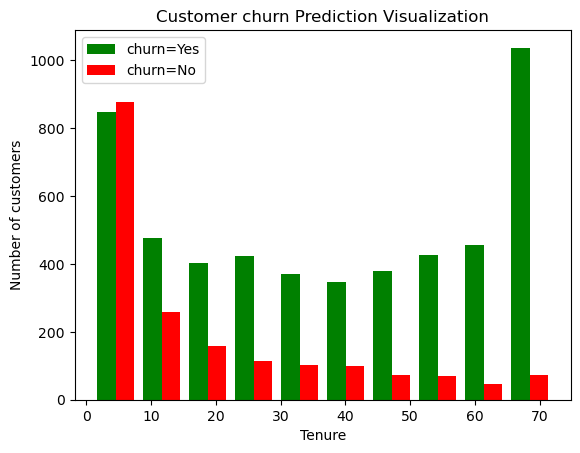

In [52]:
plt.title("Customer churn Prediction Visualization")
plt.xlabel("Tenure")
plt.ylabel("Number of customers")
plt.hist([tenure_churn_no,tenure_churn_yes],color=["green","red"],label=["churn=Yes","churn=No"])
plt.legend()

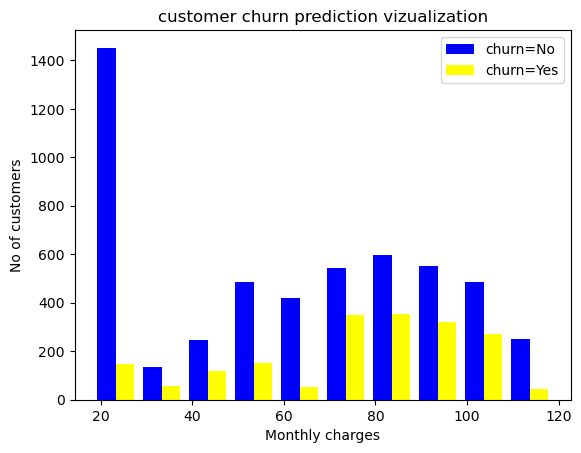

In [53]:
mc_churn_no=data[data["Churn"]=="No"]["MonthlyCharges"]
mc_churn_yes=data[data["Churn"]=="Yes"]["MonthlyCharges"]
plt.hist([mc_churn_no,mc_churn_yes],color=["blue","yellow"],label=["churn=No","churn=Yes"])
plt.title("customer churn prediction vizualization")
plt.xlabel("Monthly charges")
plt.ylabel("No of customers")
plt.legend()
plt.show()

In [54]:
for column in data:
    print(f'{column} : {data[column].unique()}')

gender : ['Female' 'Male']
SeniorCitizen : [0 1]
Partner : ['Yes' 'No']
Dependents : ['No' 'Yes']
tenure : [ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26 39]
PhoneService : ['No' 'Yes']
MultipleLines : ['No phone service' 'No' 'Yes']
InternetService : ['DSL' 'Fiber optic' 'No']
OnlineSecurity : ['No' 'Yes' 'No internet service']
OnlineBackup : ['Yes' 'No' 'No internet service']
DeviceProtection : ['No' 'Yes' 'No internet service']
TechSupport : ['No' 'Yes' 'No internet service']
StreamingTV : ['No' 'Yes' 'No internet service']
StreamingMovies : ['No' 'Yes' 'No internet service']
Contract : ['Month-to-month' 'One year' 'Two year']
PaperlessBilling : ['Yes' 'No']
PaymentMethod : ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
MonthlyCharges : [29.85 56.95 53.85 ... 63.1  44.2  78

In [55]:
data.replace("No internet service","No",inplace=True)
data.replace("No phone service","No",inplace=True)

In [56]:
for column in data:
    print(f'{column} : {data[column].unique()}')

gender : ['Female' 'Male']
SeniorCitizen : [0 1]
Partner : ['Yes' 'No']
Dependents : ['No' 'Yes']
tenure : [ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26 39]
PhoneService : ['No' 'Yes']
MultipleLines : ['No' 'Yes']
InternetService : ['DSL' 'Fiber optic' 'No']
OnlineSecurity : ['No' 'Yes']
OnlineBackup : ['Yes' 'No']
DeviceProtection : ['No' 'Yes']
TechSupport : ['No' 'Yes']
StreamingTV : ['No' 'Yes']
StreamingMovies : ['No' 'Yes']
Contract : ['Month-to-month' 'One year' 'Two year']
PaperlessBilling : ['Yes' 'No']
PaymentMethod : ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
MonthlyCharges : [29.85 56.95 53.85 ... 63.1  44.2  78.7 ]
TotalCharges : [  29.85 1889.5   108.15 ...  346.45  306.6  6844.5 ]
Churn : ['No' 'Yes']


In [57]:

yes_no_columns=[
"SeniorCitizen",
"Partner",
"Dependents",
"PhoneService",
"MultipleLines",
"OnlineSecurity",
"OnlineBackup",
"DeviceProtection",
"TechSupport",
"StreamingTV",
"StreamingMovies",
"PaperlessBilling",
"Churn"]
data["PaperlessBilling"].replace("Yes",1,inplace=True)
data["PaperlessBilling"].replace("No",0,inplace=True)
for col in yes_no_columns:
    data[col].replace("Yes",1,inplace=True)
    data[col].replace("No",0,inplace=True)

In [58]:
for column in data:
    print(f'{column} : {data[column].unique()}')

gender : ['Female' 'Male']
SeniorCitizen : [0 1]
Partner : [1 0]
Dependents : [0 1]
tenure : [ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26 39]
PhoneService : [0 1]
MultipleLines : [0 1]
InternetService : ['DSL' 'Fiber optic' 'No']
OnlineSecurity : [0 1]
OnlineBackup : [1 0]
DeviceProtection : [0 1]
TechSupport : [0 1]
StreamingTV : [0 1]
StreamingMovies : [0 1]
Contract : ['Month-to-month' 'One year' 'Two year']
PaperlessBilling : [1 0]
PaymentMethod : ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
MonthlyCharges : [29.85 56.95 53.85 ... 63.1  44.2  78.7 ]
TotalCharges : [  29.85 1889.5   108.15 ...  346.45  306.6  6844.5 ]
Churn : [0 1]


In [59]:
data["gender"].replace("Female",0,inplace=True)
data["gender"].replace("Male",1,inplace=True)

In [60]:
for col in data:
    print(f"{col}:{data[col].unique()}")

gender:[0 1]
SeniorCitizen:[0 1]
Partner:[1 0]
Dependents:[0 1]
tenure:[ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26 39]
PhoneService:[0 1]
MultipleLines:[0 1]
InternetService:['DSL' 'Fiber optic' 'No']
OnlineSecurity:[0 1]
OnlineBackup:[1 0]
DeviceProtection:[0 1]
TechSupport:[0 1]
StreamingTV:[0 1]
StreamingMovies:[0 1]
Contract:['Month-to-month' 'One year' 'Two year']
PaperlessBilling:[1 0]
PaymentMethod:['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
MonthlyCharges:[29.85 56.95 53.85 ... 63.1  44.2  78.7 ]
TotalCharges:[  29.85 1889.5   108.15 ...  346.45  306.6  6844.5 ]
Churn:[0 1]


In [61]:
data

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,1,0,0,DSL,0,1,0,0,0,0,Month-to-month,1,Electronic check,29.85,29.85,0
1,1,0,0,0,34,1,0,DSL,1,0,1,0,0,0,One year,0,Mailed check,56.95,1889.50,0
2,1,0,0,0,2,1,0,DSL,1,1,0,0,0,0,Month-to-month,1,Mailed check,53.85,108.15,1
3,1,0,0,0,45,0,0,DSL,1,0,1,1,0,0,One year,0,Bank transfer (automatic),42.30,1840.75,0
4,0,0,0,0,2,1,0,Fiber optic,0,0,0,0,0,0,Month-to-month,1,Electronic check,70.70,151.65,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,1,0,1,1,24,1,1,DSL,1,0,1,1,1,1,One year,1,Mailed check,84.80,1990.50,0
7039,0,0,1,1,72,1,1,Fiber optic,0,1,1,0,1,1,One year,1,Credit card (automatic),103.20,7362.90,0
7040,0,0,1,1,11,0,0,DSL,1,0,0,0,0,0,Month-to-month,1,Electronic check,29.60,346.45,0
7041,1,1,1,0,4,1,1,Fiber optic,0,0,0,0,0,0,Month-to-month,1,Mailed check,74.40,306.60,1


In [62]:
df=pd.get_dummies(data=data,columns=["InternetService","Contract","PaymentMethod"])
df.replace(True,1,inplace=True)
df.replace(False,0,inplace=True)


In [63]:
df.dtypes

gender                                       int64
SeniorCitizen                                int64
Partner                                      int64
Dependents                                   int64
tenure                                       int64
PhoneService                                 int64
MultipleLines                                int64
OnlineSecurity                               int64
OnlineBackup                                 int64
DeviceProtection                             int64
TechSupport                                  int64
StreamingTV                                  int64
StreamingMovies                              int64
PaperlessBilling                             int64
MonthlyCharges                             float64
TotalCharges                               float64
Churn                                        int64
InternetService_DSL                          int64
InternetService_Fiber optic                  int64
InternetService_No             

In [64]:
df.sample(3)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
6090,1,0,1,1,68,1,0,1,1,1,...,0,1,0,0,0,1,0,1,0,0
6421,0,0,0,0,21,1,0,1,1,0,...,1,0,0,0,0,1,0,1,0,0
891,1,0,1,1,50,1,1,0,1,1,...,0,1,0,1,0,0,1,0,0,0


In [65]:
#data scaling
cols_to_scale=["tenure","MonthlyCharges","TotalCharges"]

In [66]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
#converting values present in tenure,monthlycharges,totalcharges into range 0 to 1
df[cols_to_scale]=scaler.fit_transform(df[cols_to_scale])

In [67]:
df.sample(5)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
1500,0,0,0,0,0.507042,0,0,0,0,1,...,1,0,0,1,0,0,0,1,0,0
5922,1,0,1,1,1.000000,1,1,1,0,1,...,0,1,0,0,0,1,1,0,0,0
2948,1,1,1,0,0.563380,1,1,0,0,1,...,0,1,0,1,0,0,0,0,1,0
1116,0,0,0,0,0.521127,1,1,0,0,0,...,0,0,1,0,1,0,0,0,1,0
2301,0,0,1,0,0.098592,1,1,0,0,0,...,0,1,0,1,0,0,0,0,1,0


In [68]:
for col in df:
    print (f'{col}: {df[col].unique()}')
#we can se walue scale between 0 to 1

gender: [0 1]
SeniorCitizen: [0 1]
Partner: [1 0]
Dependents: [0 1]
tenure: [0.         0.46478873 0.01408451 0.61971831 0.09859155 0.29577465
 0.12676056 0.38028169 0.85915493 0.16901408 0.21126761 0.8028169
 0.67605634 0.33802817 0.95774648 0.71830986 0.98591549 0.28169014
 0.15492958 0.4084507  0.64788732 1.         0.22535211 0.36619718
 0.05633803 0.63380282 0.14084507 0.97183099 0.87323944 0.5915493
 0.1971831  0.83098592 0.23943662 0.91549296 0.11267606 0.02816901
 0.42253521 0.69014085 0.88732394 0.77464789 0.08450704 0.57746479
 0.47887324 0.66197183 0.3943662  0.90140845 0.52112676 0.94366197
 0.43661972 0.76056338 0.50704225 0.49295775 0.56338028 0.07042254
 0.04225352 0.45070423 0.92957746 0.30985915 0.78873239 0.84507042
 0.18309859 0.26760563 0.73239437 0.54929577 0.81690141 0.32394366
 0.6056338  0.25352113 0.74647887 0.70422535 0.35211268 0.53521127]
PhoneService: [0 1]
MultipleLines: [0 1]
OnlineSecurity: [0 1]
OnlineBackup: [1 0]
DeviceProtection: [0 1]
TechSupport: [

In [69]:
x=df.drop("Churn",axis=1)
y=df["Churn"]

In [70]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=5)

In [71]:
import tensorflow as tf
from tensorflow import keras
model=keras.Sequential([
    keras.layers.Dense(20,input_shape=(26,),activation="relu"),
    keras.layers.Dense(20,activation="relu"),
    keras.layers.Dense(1,activation="sigmoid")
])

In [72]:
model.compile(optimizer="adam",
             loss="binary_crossentropy",#log loss function
             metrics=["accuracy"])#number of currectly classified examples/total number of examples

In [73]:
model.fit(x_train,y_train,epochs=200)

Epoch 1/200
176/176 [==============================] - 1s 2ms/step - loss: 0.5260 - accuracy: 0.7157
Epoch 2/200
176/176 [==============================] - 0s 2ms/step - loss: 0.4330 - accuracy: 0.7899
Epoch 3/200
176/176 [==============================] - 0s 2ms/step - loss: 0.4238 - accuracy: 0.7956
Epoch 4/200
176/176 [==============================] - 0s 1ms/step - loss: 0.4189 - accuracy: 0.8014
Epoch 5/200
176/176 [==============================] - 0s 1ms/step - loss: 0.4156 - accuracy: 0.8032
Epoch 6/200
176/176 [==============================] - 0s 2ms/step - loss: 0.4129 - accuracy: 0.8002
Epoch 7/200
176/176 [==============================] - 0s 2ms/step - loss: 0.4110 - accuracy: 0.8053
Epoch 8/200
176/176 [==============================] - 0s 1ms/step - loss: 0.4091 - accuracy: 0.8050
Epoch 9/200
176/176 [==============================] - 0s 2ms/step - loss: 0.4075 - accuracy: 0.8057
Epoch 10/200
176/176 [==============================] - 0s 2ms/step - loss: 0.4060 - accura

In [81]:
model.evaluate(x_test,y_test)

44/44 [==============================] - 0s 2ms/step - loss: 0.5268 - accuracy: 0.7683


[0.5267581939697266, 0.7683013677597046]

In [82]:
y_predicted=model.predict(x_test)

44/44 [==============================] - 0s 1ms/step


In [83]:
y_predicted=y_predicted.reshape(1407,)
y_predicted

array([0.13091475, 0.3511366 , 0.00095845, ..., 0.739014  , 0.7248184 ,
       0.7483483 ], dtype=float32)

In [84]:
list=[]
for i in y_predicted:
    if i<0.5:
        list.append(0)
    else:
        list.append(1)

In [85]:
y_predicted=list
y_predicted[:10]

[0, 0, 0, 1, 1, 1, 0, 0, 0, 0]

In [86]:
from sklearn.metrics import confusion_matrix,classification_report

In [89]:
print (classification_report(y_test,y_predicted))

              precision    recall  f1-score   support

           0       0.82      0.86      0.84       999
           1       0.62      0.53      0.57       408

    accuracy                           0.77      1407
   macro avg       0.72      0.70      0.71      1407
weighted avg       0.76      0.77      0.76      1407



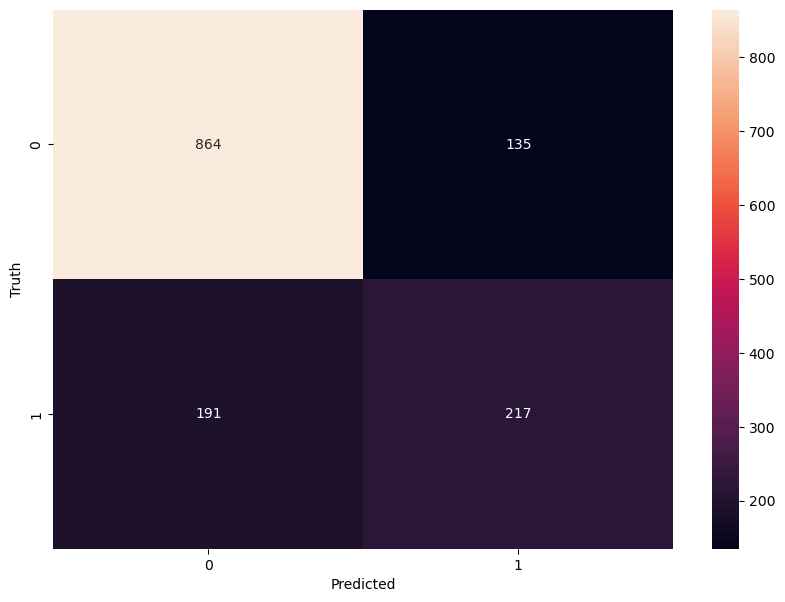

In [90]:
import seaborn as sb
cm=tf.math.confusion_matrix(y_test,y_predicted)
plt.figure(figsize=(10,7))
sb.heatmap(cm,annot=True,fmt="d")
plt.xlabel("Predicted")
plt.ylabel("Truth")
plt.show()